# Imports

In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

## Getting the Data

In [2]:
base_path = "../input/tabular-playground-series-jan-2022/"

train_data = pd.read_csv(base_path + "train.csv")
test_data = pd.read_csv(base_path + "test.csv")
sample_submission_data = pd.read_csv(base_path + "sample_submission.csv")

In [3]:
train_data.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
test_data.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


## Concatenating Training and Testing Data

In [5]:
full_data = pd.concat([train_data.iloc[:, :-1], test_data])
full_data.reset_index(drop=True, inplace=True)
full_data

,row_id,date,country,store,product
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
32863,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
32864,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
32865,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
32866,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


## Feature Engineering

In [6]:
# Credit to https://www.kaggle.com/ranjeetshrivastav/tps-jan-21-base-xgb

full_data['date'] = pd.to_datetime(full_data['date'])

full_data['year'] = full_data['date'].dt.year
full_data['month'] = full_data['date'].dt.month
full_data['day'] = full_data['date'].dt.day
full_data['dayofweek'] = full_data['date'].dt.dayofweek
full_data['dayofmonth'] = full_data['date'].dt.days_in_month
full_data['dayofyear'] = full_data['date'].dt.dayofyear
full_data['weekday'] = full_data['date'].dt.weekday

full_data.drop(columns=['date', 'row_id'], inplace = True)

In [7]:
full_data

,country,store,product,year,month,day,dayofweek,dayofmonth,dayofyear,weekday
0,Finland,KaggleMart,Kaggle Mug,2015,1,1,3,31,1,3
1,Finland,KaggleMart,Kaggle Hat,2015,1,1,3,31,1,3
2,Finland,KaggleMart,Kaggle Sticker,2015,1,1,3,31,1,3
3,Finland,KaggleRama,Kaggle Mug,2015,1,1,3,31,1,3
4,Finland,KaggleRama,Kaggle Hat,2015,1,1,3,31,1,3
...,...,...,...,...,...,...,...,...,...,...
32863,Sweden,KaggleMart,Kaggle Hat,2019,12,31,1,31,365,1
32864,Sweden,KaggleMart,Kaggle Sticker,2019,12,31,1,31,365,1
32865,Sweden,KaggleRama,Kaggle Mug,2019,12,31,1,31,365,1
32866,Sweden,KaggleRama,Kaggle Hat,2019,12,31,1,31,365,1


# Analysis and EDA on FullData

In [8]:
def Pie_Bar_Plot(data, col):
    # Gettting Column Value Counts
    column_value_counts = full_data[col].value_counts()

    # Creating the explode values_list
    explode_len = len(column_value_counts)
    explode = []
    for i in range(explode_len):
        explode.append(0.1)

    # Creating Subplots
    f, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Pie Plot
    column_value_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f'{col.capitalize()} Pie Plot', fontsize=16, fontweight="bold")
    ax[0].set_ylabel('')

    # Barplot / Count Plot
    sns.barplot(x=column_value_counts.index, y=column_value_counts.values, ax=ax[1])
    ax[1].set_title(f'{col.capitalize()} Count Plot', fontsize=16, fontweight="bold")
    plt.show()

    print("\n\n")

## Distribution Plots using Pie and Bar Plot

In [9]:
cols_to_plot = full_data.columns.to_list()
cols_to_plot.remove("day")
cols_to_plot.remove("dayofyear")

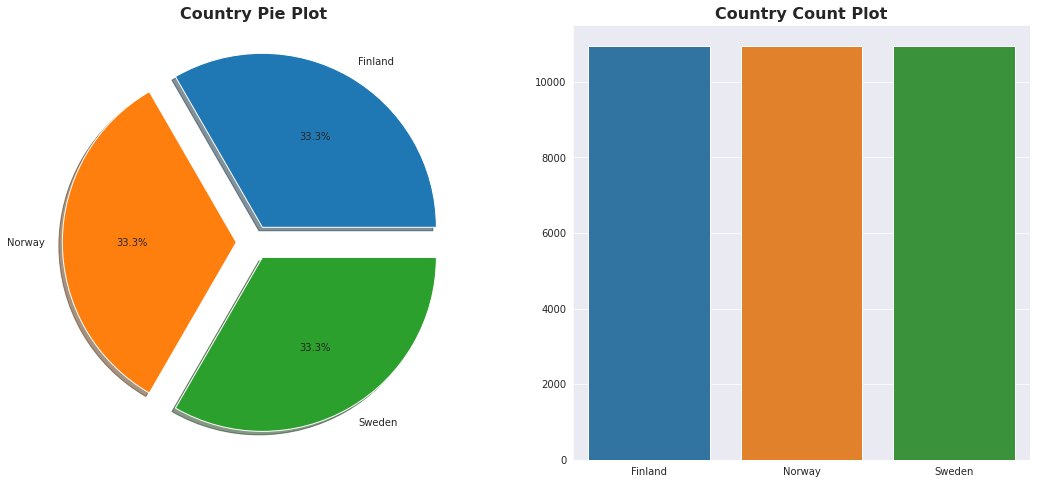

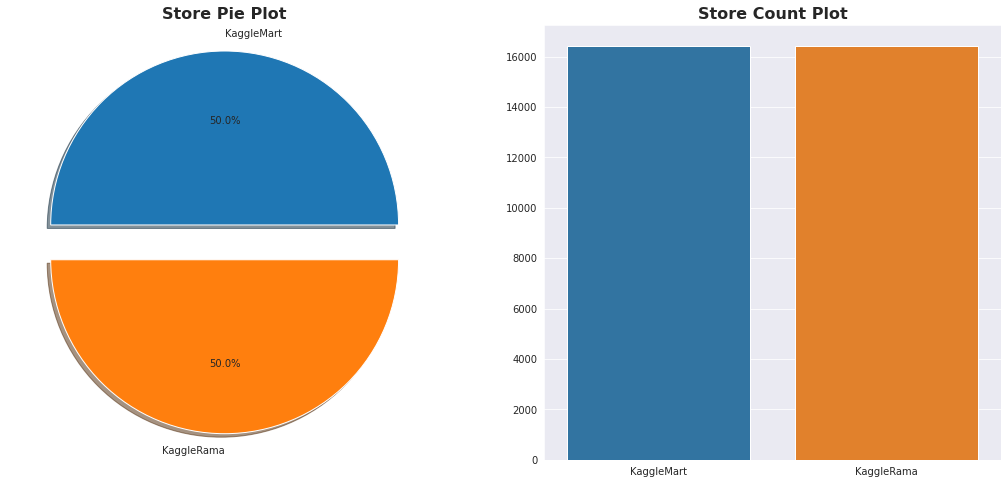

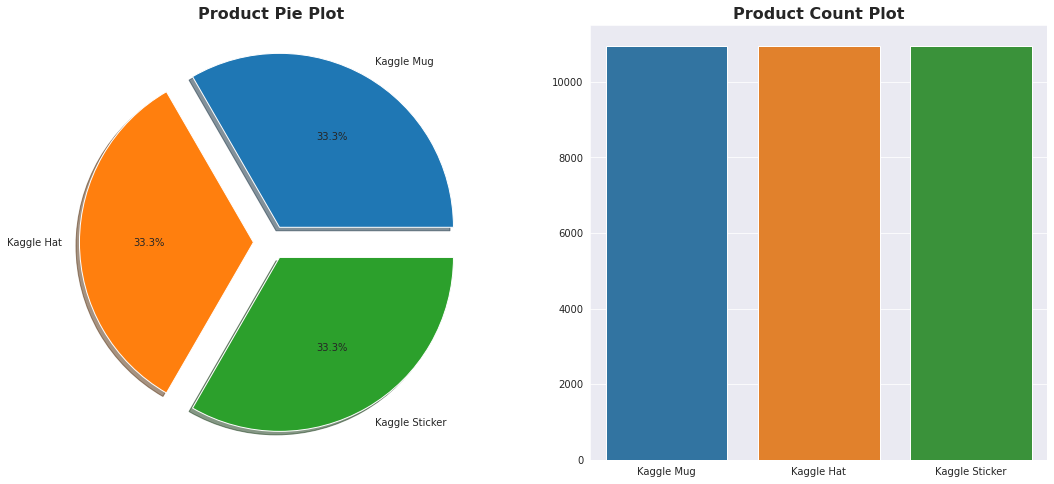

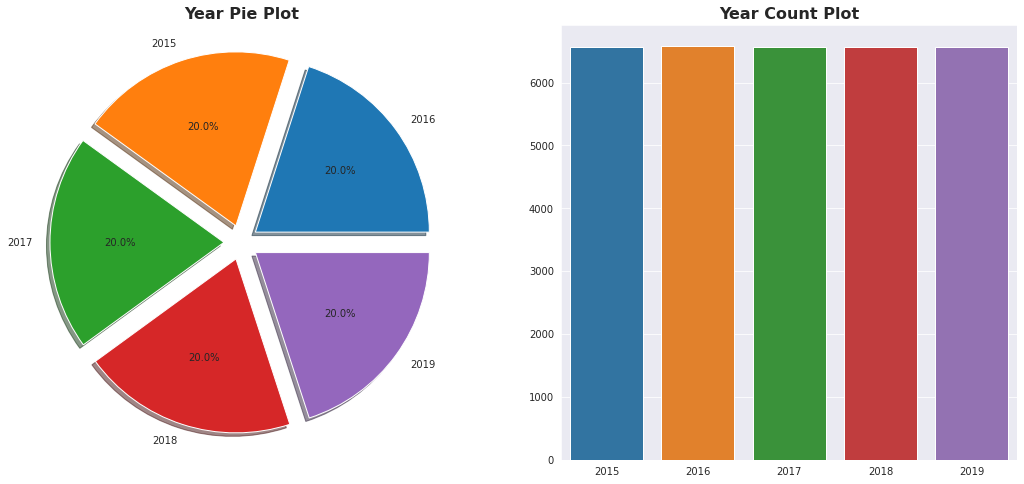

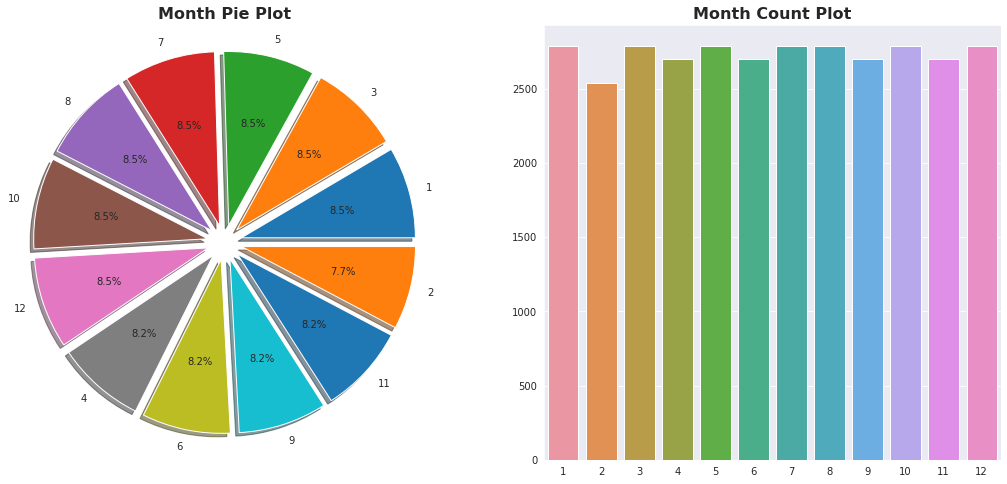

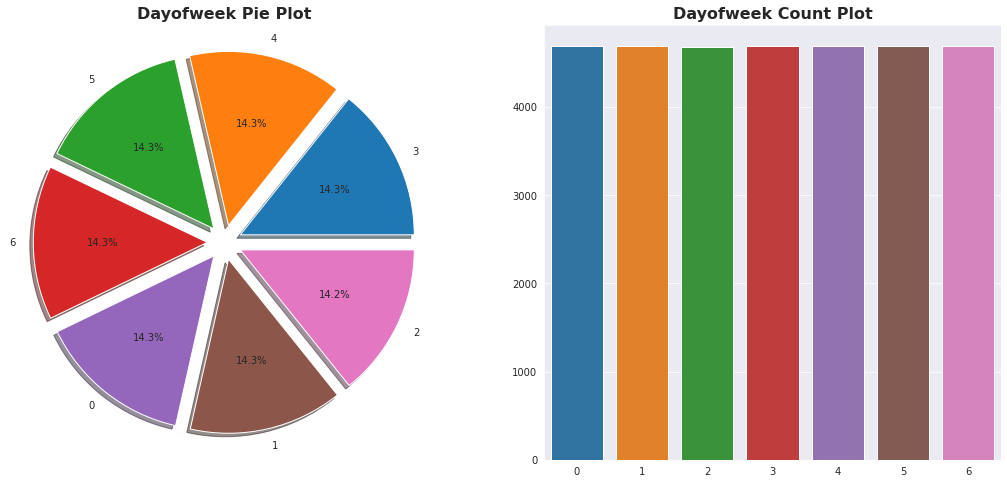

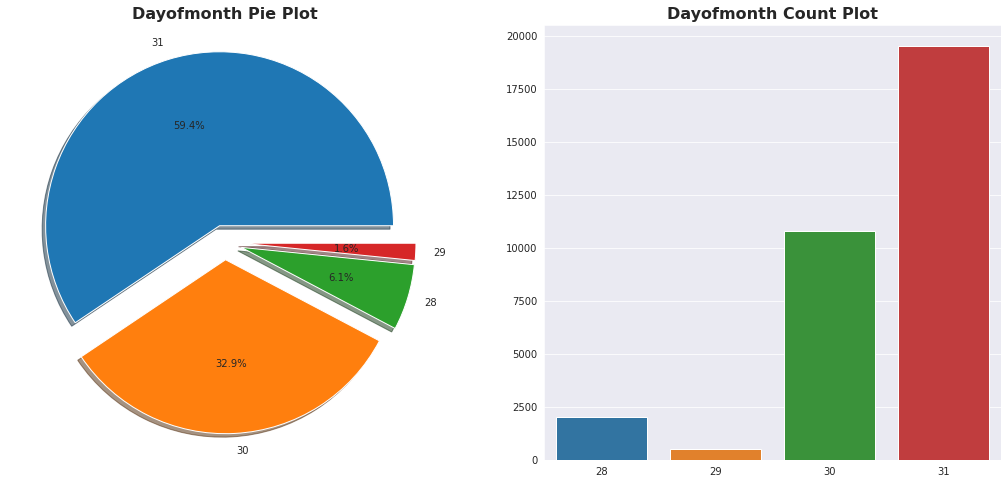

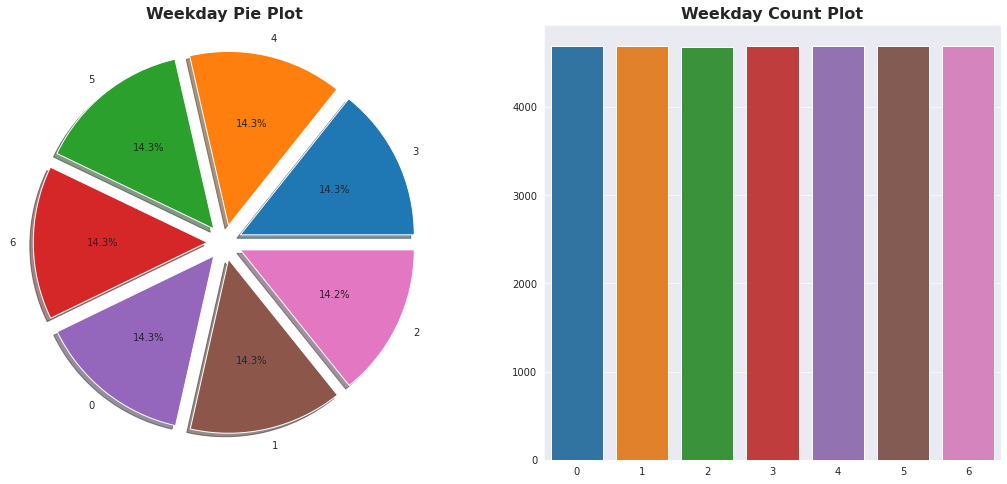

In [10]:
for col in cols_to_plot:
    Pie_Bar_Plot(full_data, col)

## Crosstabs

In [11]:
pd.crosstab(full_data.country, full_data.store, margins=True).style.background_gradient(cmap='summer_r')

store,KaggleMart,KaggleRama,All
country,,,
Finland,5478,5478,10956
Norway,5478,5478,10956
Sweden,5478,5478,10956
All,16434,16434,32868


In [12]:
pd.crosstab(full_data.country, full_data.year, margins=True).style.background_gradient(cmap='summer_r')

year,2015,2016,2017,2018,2019,All
country,,,,,,
Finland,2190,2196,2190,2190,2190,10956
Norway,2190,2196,2190,2190,2190,10956
Sweden,2190,2196,2190,2190,2190,10956
All,6570,6588,6570,6570,6570,32868


In [13]:
pd.crosstab(full_data.country, full_data.month, margins=True).style.background_gradient(cmap='summer_r')

month,1,2,3,4,5,6,7,8,9,10,11,12,All
country,,,,,,,,,,,,,
Finland,930,846,930,900,930,900,930,930,900,930,900,930,10956
Norway,930,846,930,900,930,900,930,930,900,930,900,930,10956
Sweden,930,846,930,900,930,900,930,930,900,930,900,930,10956
All,2790,2538,2790,2700,2790,2700,2790,2790,2700,2790,2700,2790,32868


In [14]:
pd.crosstab(full_data.year, full_data.month, margins=True).style.background_gradient(cmap='summer_r')

month,1,2,3,4,5,6,7,8,9,10,11,12,All
year,,,,,,,,,,,,,
2015,558,504,558,540,558,540,558,558,540,558,540,558,6570
2016,558,522,558,540,558,540,558,558,540,558,540,558,6588
2017,558,504,558,540,558,540,558,558,540,558,540,558,6570
2018,558,504,558,540,558,540,558,558,540,558,540,558,6570
2019,558,504,558,540,558,540,558,558,540,558,540,558,6570
All,2790,2538,2790,2700,2790,2700,2790,2790,2700,2790,2700,2790,32868


## Year vs Number of Sales (for Training Data)

In [15]:
train_data["date"] = pd.to_datetime(train_data["date"])

Thanks to https://www.kaggle.com/vad13irt/tps-jan-2022-exploratory-data-analysis for plot idea below.

In [16]:
def Date_Sales_Plot(data, hue=None):
    plt.figure(figsize=(25, 6))
    sns.lineplot(data=train_data, x="date", y="num_sold", hue=hue, err_style=None)
    plt.xlabel("Date", fontsize=12, fontweight="bold")
    plt.ylabel("Products Sold", fontsize=12, fontweight="bold")
    plt.title("Date vs Products Sold", fontsize=16, fontweight="bold")
    if hue:
        plt.legend(fontsize=13, edgecolor=None, facecolor=None, markerscale=2, handlelength=1, title=None)
    plt.show()

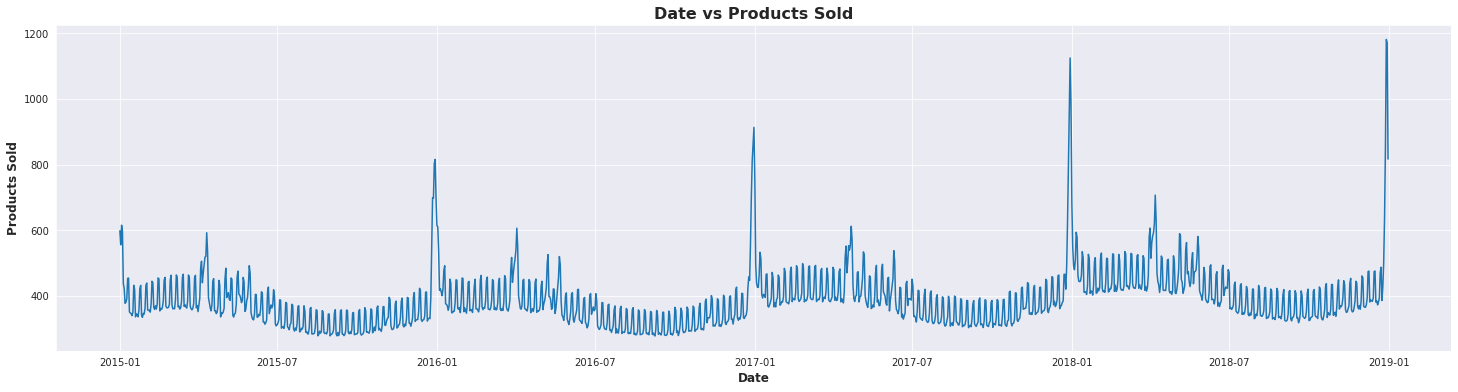

In [17]:
Date_Sales_Plot(train_data)

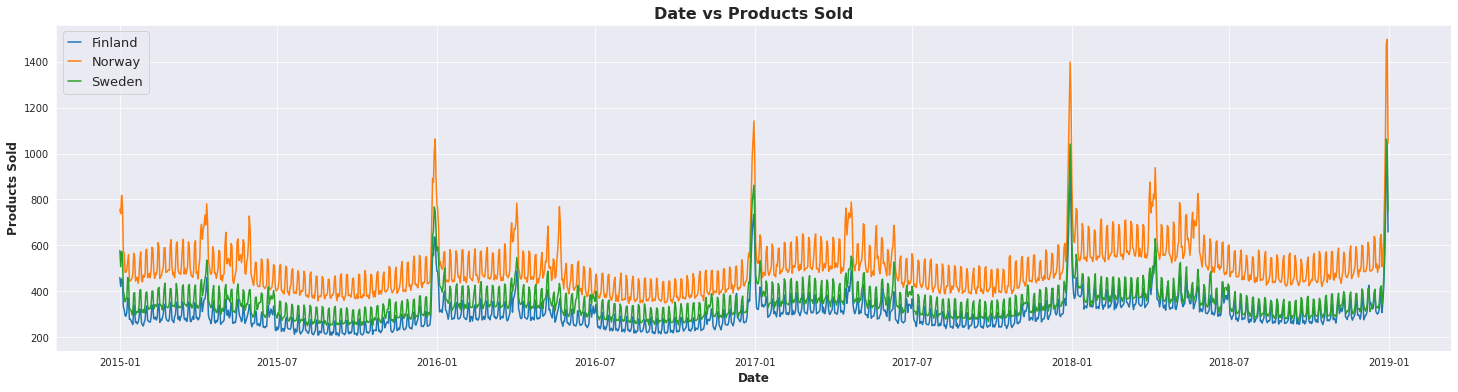

In [18]:
Date_Sales_Plot(train_data, "country")

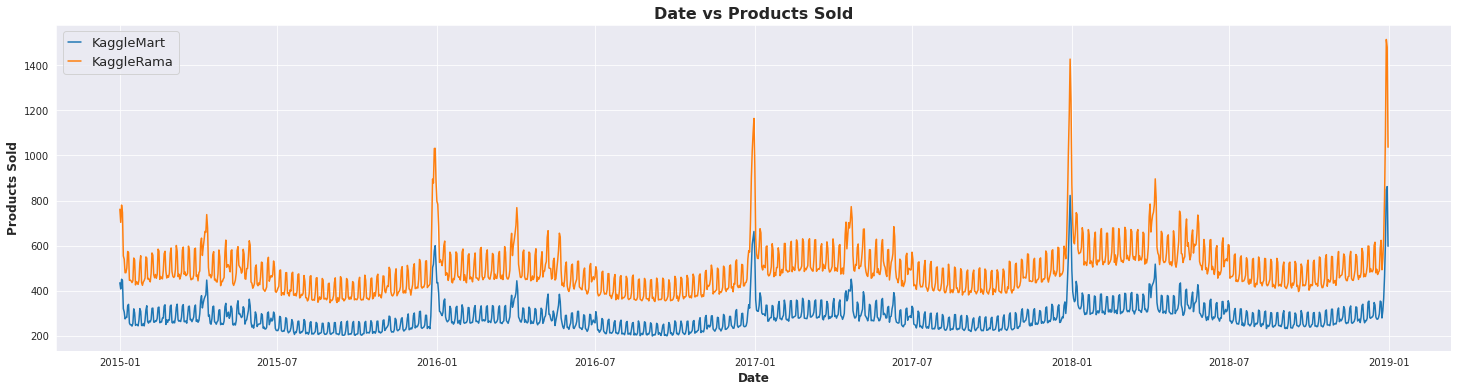

In [19]:
Date_Sales_Plot(train_data, "store")

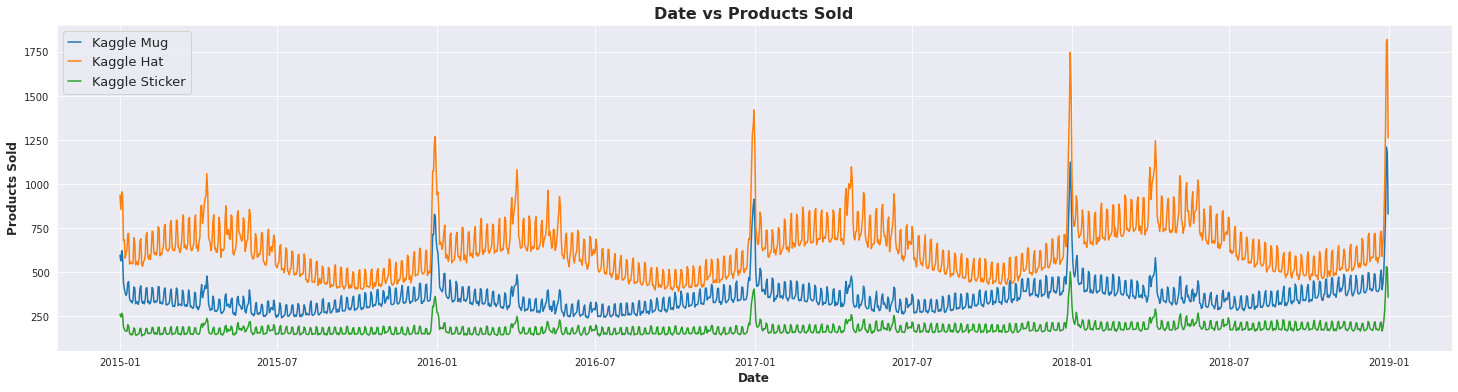

In [20]:
Date_Sales_Plot(train_data, "product")

# Preparing Data

## OneHotEncoding Categorical Variables

In [21]:
full_data = pd.concat([pd.get_dummies(full_data[["country", "store", "product"]]), full_data[["year", "month", "day"]]], axis=1)

In [22]:
# Seperating Training and Testing Data
train = full_data.iloc[:len(train_data), :]
test = full_data.iloc[len(train_data):, :]

# Machine Learning Model

In [23]:
# Train Test Split for training and testing the Regressor
from sklearn.model_selection import train_test_split

# Different Mathematical functions to calculate the Accuracy of Regression Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Using Possibly every Regression Algorithm available in Sklearn
from sklearn import neighbors, tree, ensemble
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train, train_data["num_sold"], test_size = 0.2, random_state=0)

In [25]:
MLA_compare = pd.DataFrame()

predictions_list = []

def MLA_testing(MLA):
    row_index = 0
    for regressor in MLA:
        # Training the Machine Learning Algorithm
        regressor.fit(X_train, y_train)

        # Making predictions on the test set
        y_pred = regressor.predict(X_test)

        regressor_r2_score = r2_score(y_test, y_pred)
        regressor_mse = mean_squared_error(y_test, y_pred)
        regressor_rmse = np.sqrt(regressor_mse)
        regressor_mae = mean_absolute_error(y_test, y_pred)

        MLA_name = regressor.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'R2 Score'] = regressor_r2_score
        MLA_compare.loc[row_index, 'Mean Squared Error'] = regressor_r2_score
        MLA_compare.loc[row_index, 'Root Mean Squared Error'] = regressor_r2_score
        MLA_compare.loc[row_index, 'Mean Absolute Error'] = regressor_r2_score

        predictions_list.append(regressor.predict(test))

        print(MLA_name, "Done")
        row_index+=1

In [26]:
MLA = [
    neighbors.KNeighborsRegressor(),

    tree.DecisionTreeRegressor(),

    ensemble.RandomForestRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),

    XGBRegressor(),
    CatBoostRegressor(silent=True),
    LGBMRegressor(),
]

MLA_testing(MLA=MLA)

KNeighborsRegressor Done
DecisionTreeRegressor Done
RandomForestRegressor Done
ExtraTreesRegressor Done
GradientBoostingRegressor Done
XGBRegressor Done
CatBoostRegressor Done
LGBMRegressor Done


In [27]:
# Sorting by R^2 Value
MLA_compare = MLA_compare.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
MLA_compare[:10]

,MLA Name,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,XGBRegressor,0.969398,0.969398,0.969398,0.969398
1,CatBoostRegressor,0.966509,0.966509,0.966509,0.966509
2,ExtraTreesRegressor,0.957117,0.957117,0.957117,0.957117
3,LGBMRegressor,0.954359,0.954359,0.954359,0.954359
4,RandomForestRegressor,0.946801,0.946801,0.946801,0.946801
5,GradientBoostingRegressor,0.925284,0.925284,0.925284,0.925284
6,KNeighborsRegressor,0.922838,0.922838,0.922838,0.922838
7,DecisionTreeRegressor,0.920508,0.920508,0.920508,0.920508


In [28]:
# Sorting by Mean Squared Error
MLA_compare = MLA_compare.sort_values(by="Mean Squared Error", ascending=False).reset_index(drop=True)
MLA_compare[:10]

,MLA Name,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,XGBRegressor,0.969398,0.969398,0.969398,0.969398
1,CatBoostRegressor,0.966509,0.966509,0.966509,0.966509
2,ExtraTreesRegressor,0.957117,0.957117,0.957117,0.957117
3,LGBMRegressor,0.954359,0.954359,0.954359,0.954359
4,RandomForestRegressor,0.946801,0.946801,0.946801,0.946801
5,GradientBoostingRegressor,0.925284,0.925284,0.925284,0.925284
6,KNeighborsRegressor,0.922838,0.922838,0.922838,0.922838
7,DecisionTreeRegressor,0.920508,0.920508,0.920508,0.920508


# Submission File

In [29]:
predictions_list = [np.array(x) for x in predictions_list]
prediction = [np.mean(k) for k in zip(*predictions_list)]

In [30]:
sample_submission_data["num_sold"] = prediction

In [31]:
sample_submission_data.to_csv("submission.csv", index=False)